In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_excel('Data_Train.xlsx')

## exploration

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.duplicated().sum()

220

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.reset_index(inplace=True,drop=True)

## Univariate Analysis

Airline

In [8]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [9]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
df = df[~df["Airline"].isin( ["Trujet", "Vistara Premium economy"])]

Date_of_Journey

In [11]:
df["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [12]:
df['Date'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df.drop('Date_of_Journey', inplace=True, axis=1)

In [13]:
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [14]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,4,9
10459,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,4,27
10460,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,4,27
10461,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,3,1


Source

In [15]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [16]:
df["Source"].value_counts()

Delhi       4346
Kolkata     2860
Banglore    2177
Mumbai       696
Chennai      380
Name: Source, dtype: int64

Destination

In [17]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [18]:
df["Destination"].value_counts()

Cochin       4346
Banglore     2860
Delhi        1264
New Delhi     913
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

In [19]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,4,9
10459,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,4,27
10460,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,4,27
10461,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,3,1


Route and Total_Stops

In [20]:
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [21]:
def count_minus_one(row):
    if pd.isnull(row):  
        return 0  
    else:
        count = str(row).count('→')  
        return count - 1 if count > 0 else 0  

# Apply the function to each row in the 'Route' column
df["Total_Stops"] = df['Route'].apply(lambda x: count_minus_one(x))


In [22]:
df[["Route","Total_Stops"]].head(10)

,Route,Total_Stops
0,BLR → DEL,0
1,CCU → IXR → BBI → BLR,2
2,DEL → LKO → BOM → COK,2
3,CCU → NAG → BLR,1
4,BLR → NAG → DEL,1
5,CCU → BLR,0
6,BLR → BOM → DEL,1
7,BLR → BOM → DEL,1
8,BLR → BOM → DEL,1
9,DEL → BOM → COK,1


In [23]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [24]:
df["Total_Stops"].value_counts()

1    5624
0    3473
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [25]:
df.drop(df[df['Total_Stops']==4].index, inplace = True)

Dep_Time

In [26]:
df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [27]:
df["Dep_Time_hours"] = df["Dep_Time"].apply(lambda x:x.split(":")[0]).astype(int)

df["Dep_Time_min"]=df["Dep_Time"].apply(lambda x:x.split(":")[1]).astype(int)

In [28]:
df["Dep_Time_hours"].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

In [29]:
df["Dep_Time_hours"].isna().sum()

0

In [30]:
df["Dep_Time_min"].unique()

array([20, 50, 25,  5,  0, 55, 45, 40, 10, 15, 35, 30])

In [31]:
df["Dep_Time_min"].isna().sum()

0

Arrival_Time

In [32]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [33]:
df["Arrival_Time"]=df["Arrival_Time"].apply(lambda x:x [0:6].strip())

In [34]:
df[["Arrival_Time_hours", "Arrival_Time_min"]] = df["Arrival_Time"].str.split(":", expand=True).astype(int)


In [35]:
df["Arrival_Time_hours"].unique()

array([ 1, 13,  4, 23, 21, 11, 10,  5, 19, 22,  9, 12,  6,  8,  3, 20, 16,
       18, 15, 14,  0,  2,  7, 17])

In [36]:
df["Arrival_Time_hours"].isna().sum()

0

In [37]:
df["Arrival_Time_min"].unique()

array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40])

In [38]:
df["Arrival_Time_min"].isna().sum()

0

Duration

In [39]:
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [40]:
duration_split = df['Duration'].str.split('h', expand=True)

df['Duration_hour'] = duration_split[0].str.replace(r'\D', '', regex=True).fillna(0).astype(int)

df['Duration_min'] = duration_split[1].str.replace('m', '').replace('', None).astype(float)

df['Duration_min'] = df['Duration_min'].fillna(0).astype(int)

In [41]:
df['Duration_min'].isna().sum()

0

In [42]:
df['Duration_min'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

In [43]:
df['Duration_hour'].isna().sum()

0

In [44]:
df['Duration_hour'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39, 41, 40])

Additional_Info

In [45]:
df["Additional_Info"].value_counts()

No info                         8179
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    6
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

drop columns we dont need

In [46]:
df.drop(["Route","Dep_Time","Arrival_Time","Duration","Additional_Info","Date"],inplace=True,axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10458 entries, 0 to 10462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             10458 non-null  object
 1   Source              10458 non-null  object
 2   Destination         10458 non-null  object
 3   Total_Stops         10458 non-null  int64 
 4   Price               10458 non-null  int64 
 5   Month               10458 non-null  int64 
 6   Day                 10458 non-null  int64 
 7   Dep_Time_hours      10458 non-null  int32 
 8   Dep_Time_min        10458 non-null  int32 
 9   Arrival_Time_hours  10458 non-null  int32 
 10  Arrival_Time_min    10458 non-null  int32 
 11  Duration_hour       10458 non-null  int32 
 12  Duration_min        10458 non-null  int32 
dtypes: int32(6), int64(4), object(3)
memory usage: 898.7+ KB


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.reset_index(inplace=True , drop=True)

In [50]:
df.to_csv("ml_df.csv", index=False)

## EDA

### what is most airline has trips?

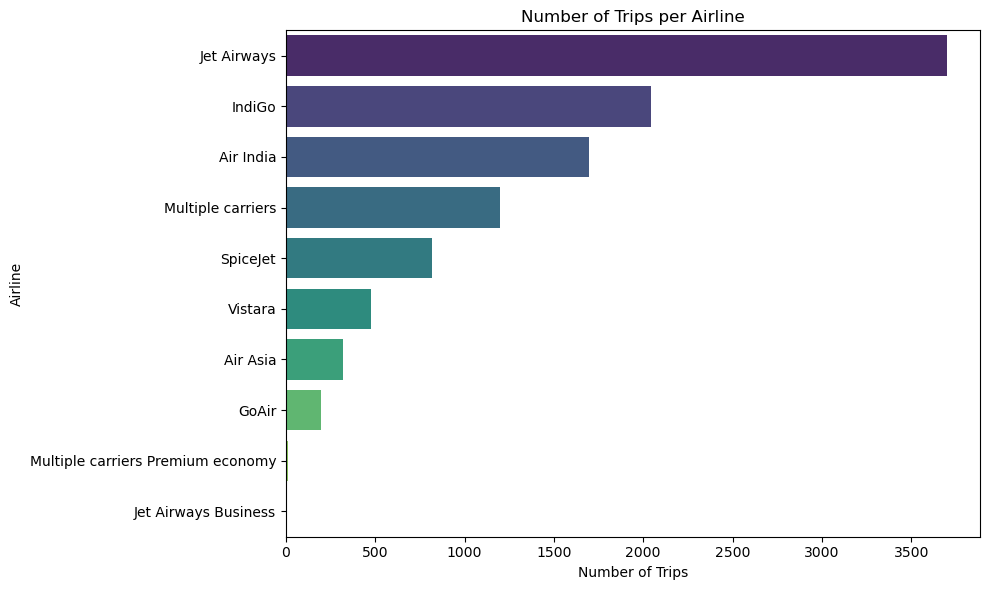

In [50]:
airline_trip_counts = df['Airline'].value_counts()
# Creating a count plot
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, y='Airline', order=airline_trip_counts.index,palette="viridis")
plt.xlabel('Number of Trips')
plt.ylabel('Airline')
plt.title('Number of Trips per Airline')
plt.tight_layout()
plt.show()

### what is the destination most frequent?

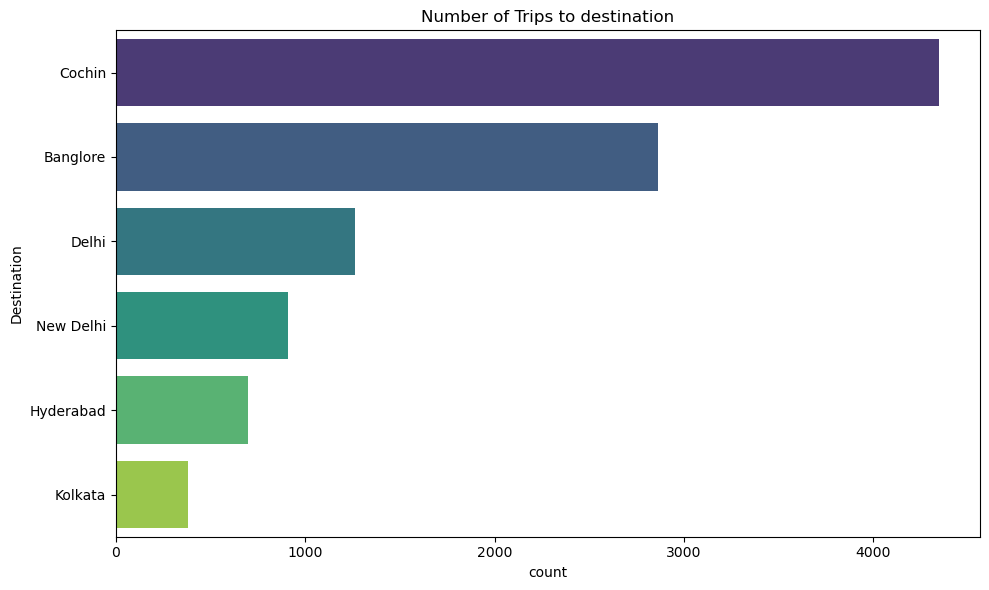

In [51]:
destination_counts = df['Destination'].value_counts()

plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, y='Destination', order=destination_counts.index,palette="viridis")
plt.ylabel('Destination')
plt.title('Number of Trips to destination')
plt.tight_layout()
plt.show()

### what is the time that most of trip Departure?


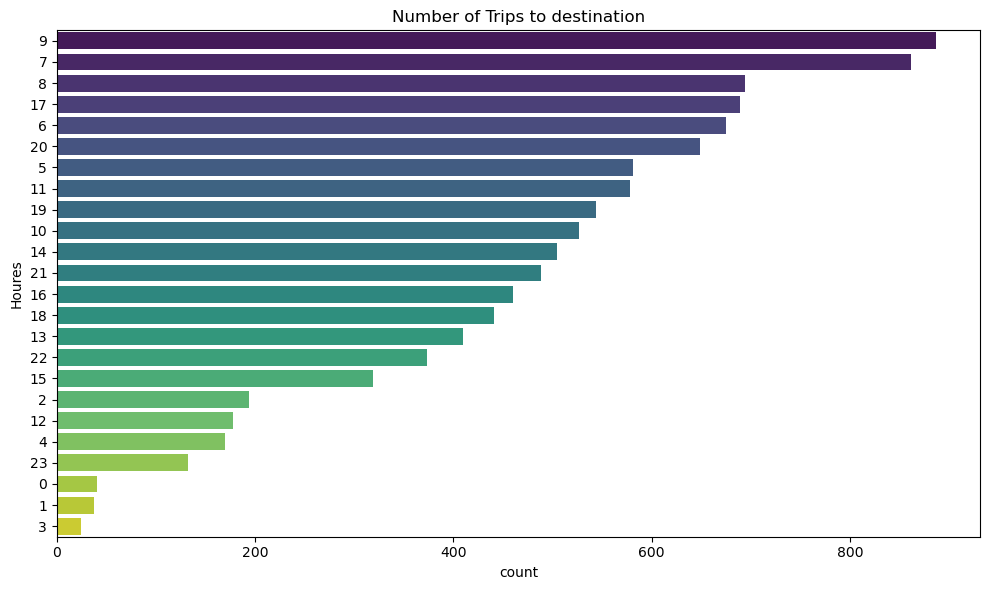

In [52]:
most_common_departure_time = df['Dep_Time_hours'].value_counts()

plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, y='Dep_Time_hours', order=most_common_departure_time.index,palette="viridis")
plt.ylabel('Houres')
plt.title('Number of Trips to destination')
plt.tight_layout()
plt.show()

### what is the months have most number of trips?

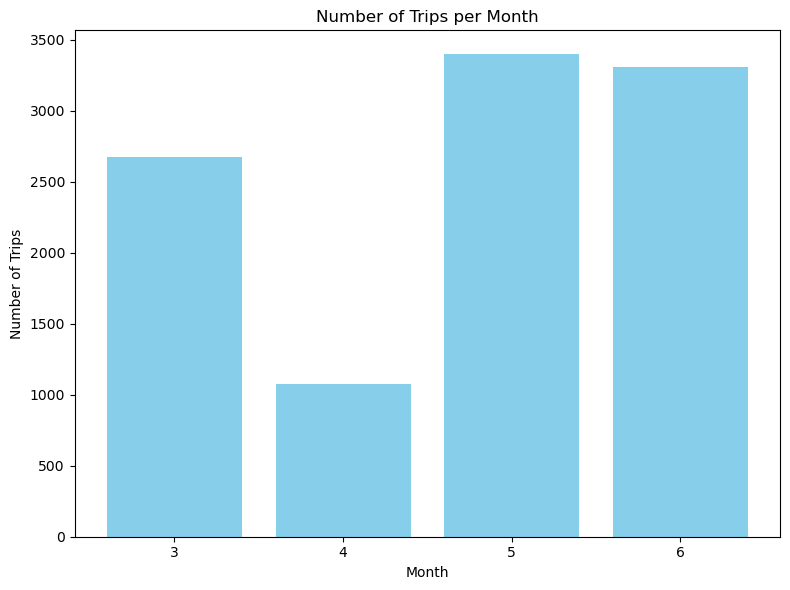

In [53]:
trips_per_month = df['Month'].value_counts().sort_index()

# Plotting the number of trips per month
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(trips_per_month.index, trips_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Month')
plt.xticks(trips_per_month.index)
plt.tight_layout()
plt.show()

### what is most days of month have trips?

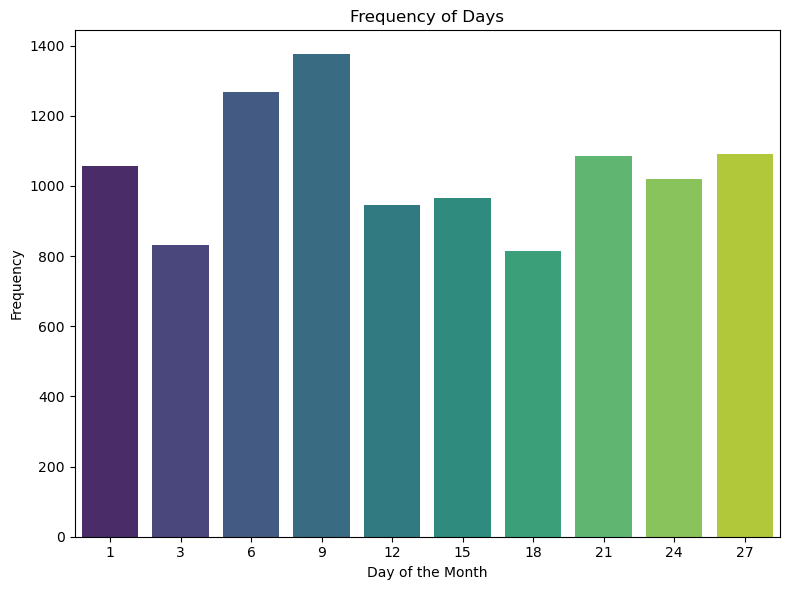

In [54]:
frequent_days = df['Day'].value_counts().reset_index()
frequent_days.columns = ['Day', 'Frequency']

# Plotting the frequency of days using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='Day', y='Frequency', data=frequent_days, palette='viridis')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.title('Frequency of Days')
plt.tight_layout()
plt.show()

### what is the sorces most ferquent?

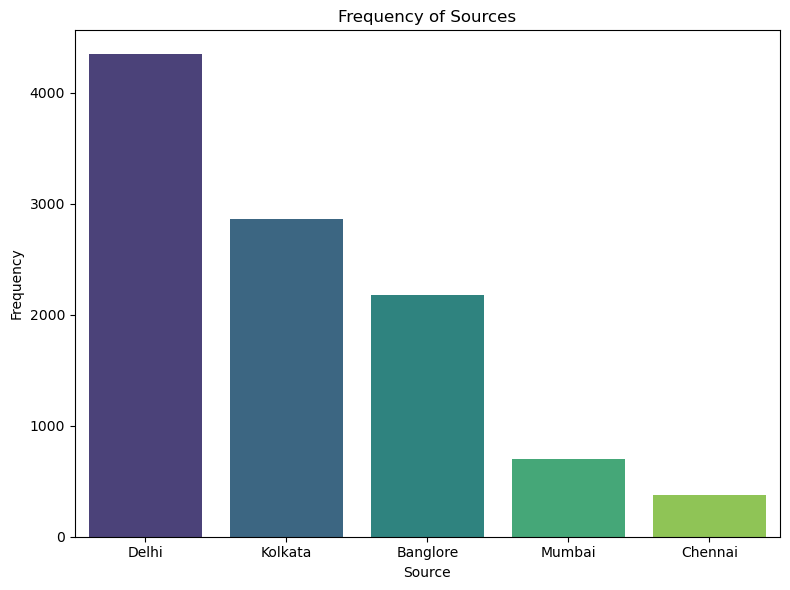

In [55]:
frequent_sources = df['Source'].value_counts().reset_index()
frequent_sources.columns = ['Source', 'Frequency']

plt.figure(figsize=(8, 6)) 
sns.barplot(x='Source', y='Frequency', data=frequent_sources, palette='viridis')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.title('Frequency of Sources')
plt.tight_layout()
plt.show()

### what is the correlation beatween stops and price?


The correlation between number of stops and price is: 0.60


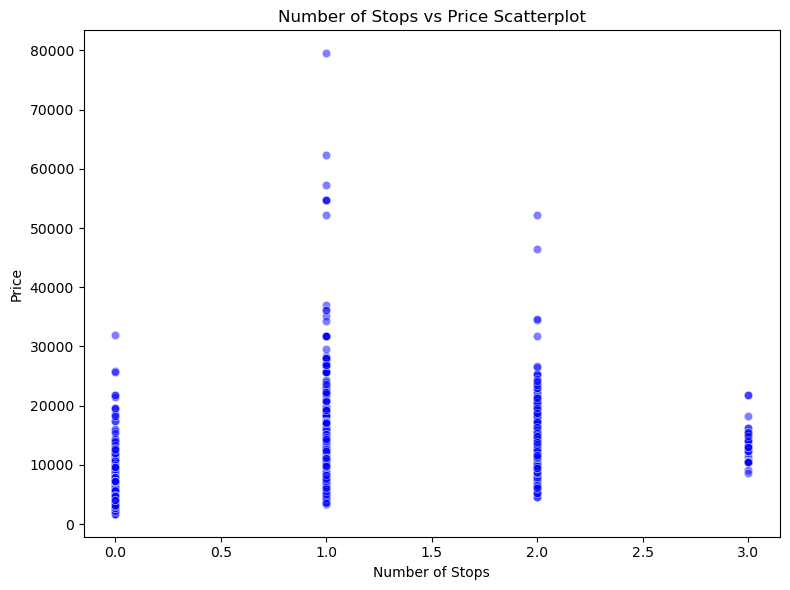

In [56]:
correlation = df['Total_Stops'].corr(df['Price'])

print(f"The correlation between number of stops and price is: {correlation:.2f}")

plt.figure(figsize=(8, 6))  
sns.scatterplot(x='Total_Stops', y='Price', data=df, alpha=0.5, color='blue')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.title('Number of Stops vs Price Scatterplot')
plt.tight_layout()
plt.show()

### what is the correlation beatween Duration hour and price?


The correlation between duration (in hours) and price is: 0.50


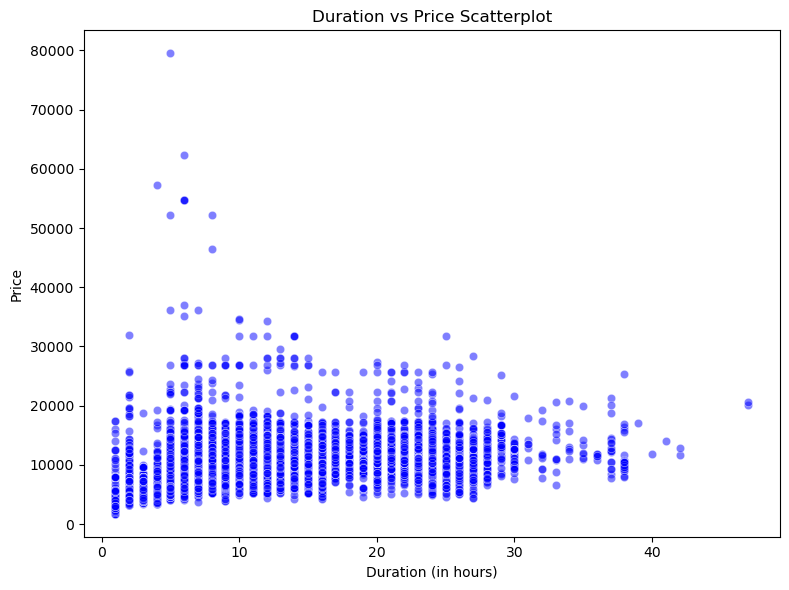

In [57]:
# Calculating the correlation between 'Duration_hour' and 'Price'
correlation_duration_price = df['Duration_hour'].corr(df['Price'])

print(f"The correlation between duration (in hours) and price is: {correlation_duration_price:.2f}")
plt.figure(figsize=(8, 6))  # Set the figure size
sns.scatterplot(x='Duration_hour', y='Price', data=df, alpha=0.5, color='blue')
plt.xlabel('Duration (in hours)')
plt.ylabel('Price')
plt.title('Duration vs Price Scatterplot')
plt.tight_layout()
plt.show()

In [58]:
df["Total_Stops"].value_counts()

1    5624
0    3471
2    1318
3      43
Name: Total_Stops, dtype: int64

In [59]:
df

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_Time_hours,Dep_Time_min,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10451,Air Asia,Kolkata,Banglore,0,4107,4,9,19,55,22,25,2,30
10452,Air India,Kolkata,Banglore,0,4145,4,27,20,45,23,20,2,35
10453,Jet Airways,Banglore,Delhi,0,7229,4,27,8,20,11,20,3,0
10454,Vistara,Banglore,New Delhi,0,12648,3,1,11,30,14,10,2,40


### what is the airline gain more money

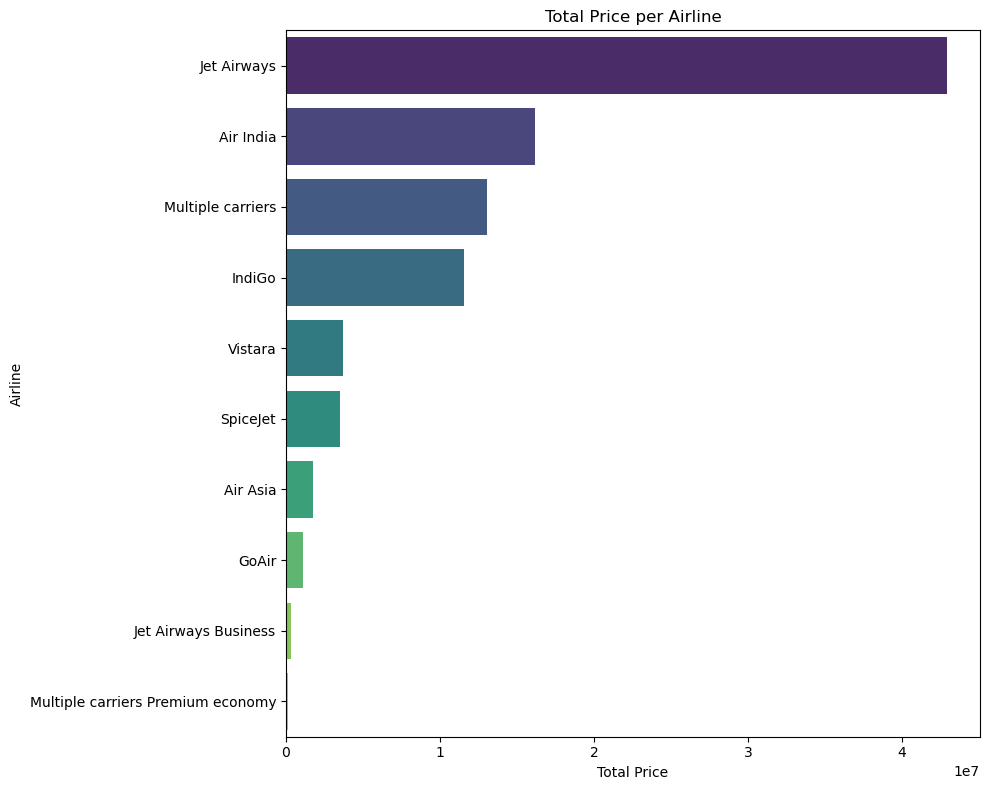

In [60]:
airline_price_sum = df.groupby("Airline")["Price"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='Price', y='Airline', data=airline_price_sum, palette='viridis')
plt.xlabel('Total Price')
plt.ylabel('Airline')
plt.title('Total Price per Airline')
plt.tight_layout()
plt.show()


## modeling

In [51]:
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression, 
    Ridge, 
    Lasso, 
    ElasticNet, 
    HuberRegressor, 
    SGDRegressor
)
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector


In [52]:
categorical_columns = ["Airline", "Source", "Destination"]
preprocessor = ColumnTransformer(
    transformers=[
        ("OHE",OneHotEncoder(sparse=False,drop = "first"), categorical_columns)
    ]
    ,remainder='passthrough'
)


In [53]:
X=df.drop('Price',axis=1)
y=df["Price"]

In [54]:
models = {
    "LinearRegression" : LinearRegression(),
    "LogisticRegression" : LogisticRegression(),
    "ridge" : Ridge(),
    "lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "HuberRegressor" : HuberRegressor(),
    "SGDRegressor" : SGDRegressor(),
    "Svr" : SVR(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "RandomForestRegressor" : RandomForestRegressor()
}
scoring = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    
}

LinearRegression
Train mean squared error score: 8056576.127010362
Test mean squared error score: 8131812.77700942
Train R2 score: 0.6233940767923098
Test R2 score: 0.6207228942950636


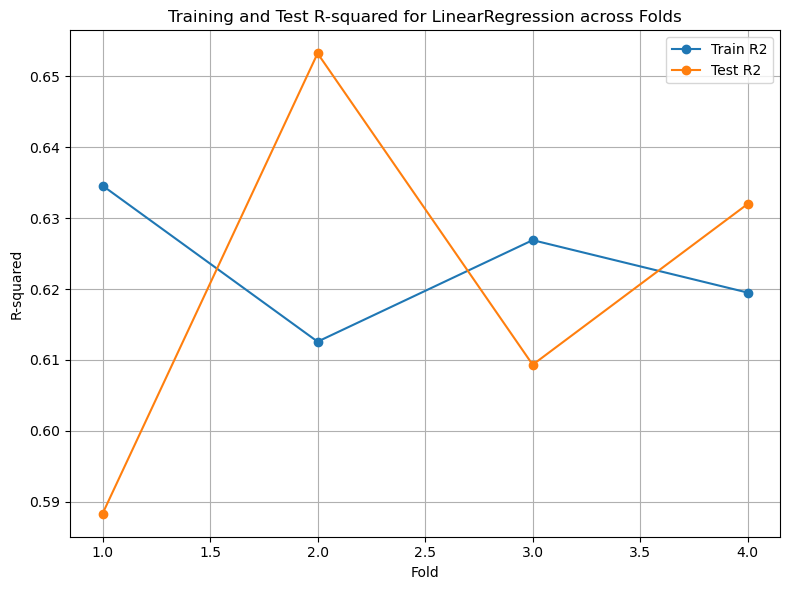

_________________________


D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


LogisticRegression
Train mean squared error score: 6495703.510679673
Test mean squared error score: 8237536.456293037
Train R2 score: 0.6961108741809611
Test R2 score: 0.6140178808422186


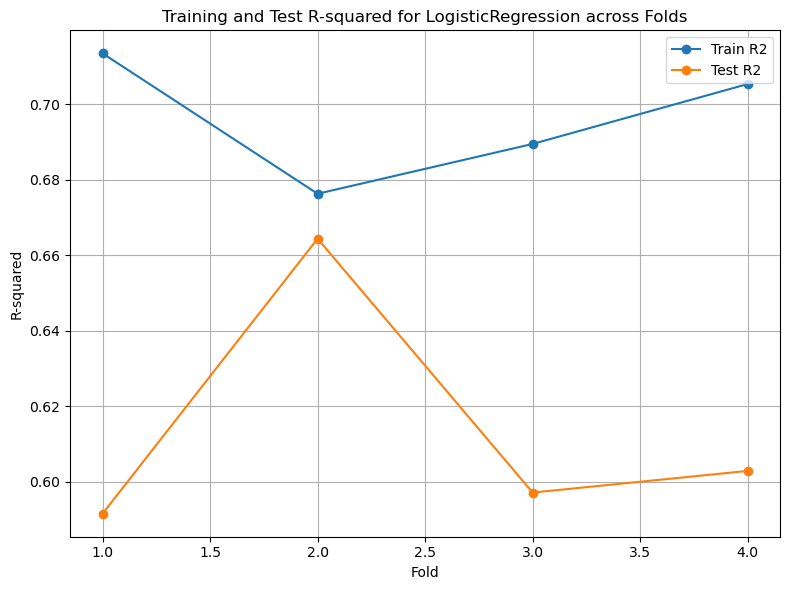

_________________________
ridge
Train mean squared error score: 8055719.175859744
Test mean squared error score: 8131231.367790591
Train R2 score: 0.6234346178357456
Test R2 score: 0.6207480629924884


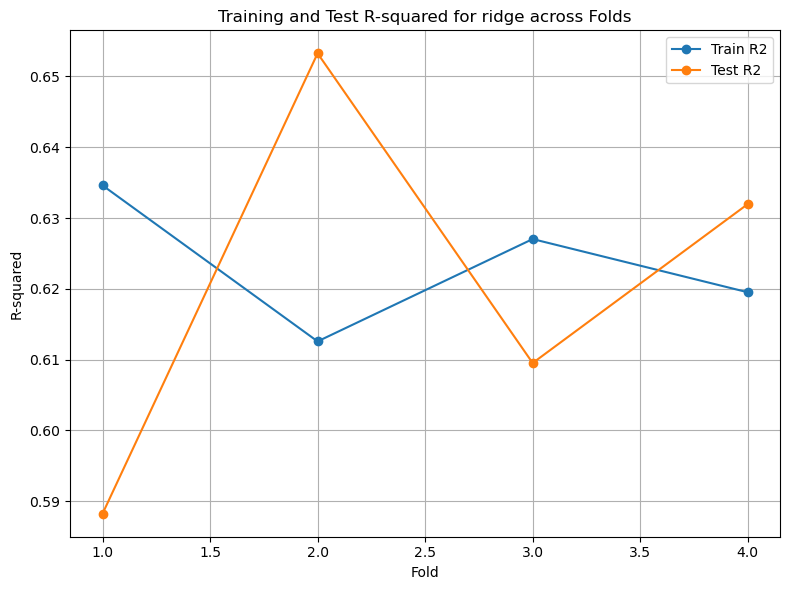

_________________________
lasso
Train mean squared error score: 8055821.951936018
Test mean squared error score: 8131234.577381798
Train R2 score: 0.6234298115450645
Test R2 score: 0.6207483565432891


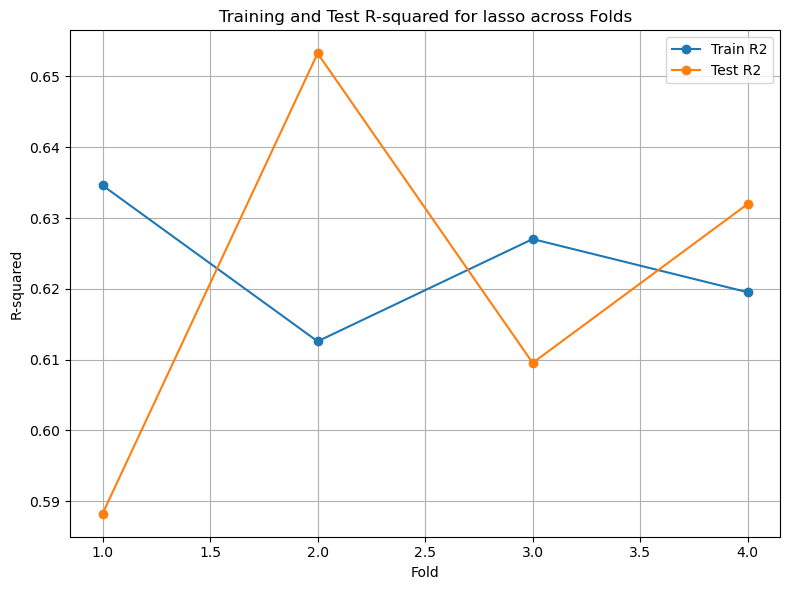

_________________________
ElasticNet
Train mean squared error score: 8927748.697697757
Test mean squared error score: 8972302.574687138
Train R2 score: 0.5826470032461579
Test R2 score: 0.5813497328383616


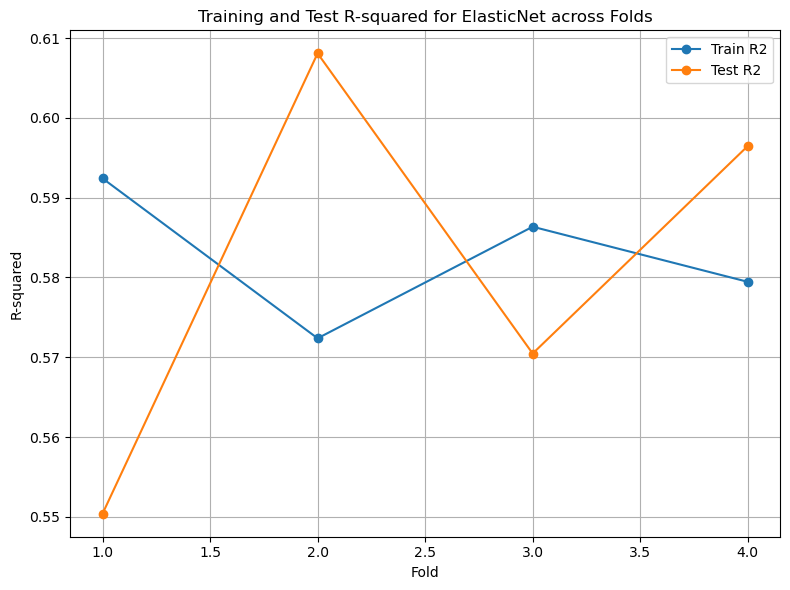

_________________________
HuberRegressor
Train mean squared error score: 8341705.5356996935
Test mean squared error score: 8396648.706179343
Train R2 score: 0.6100793708615837
Test R2 score: 0.6085286890133897


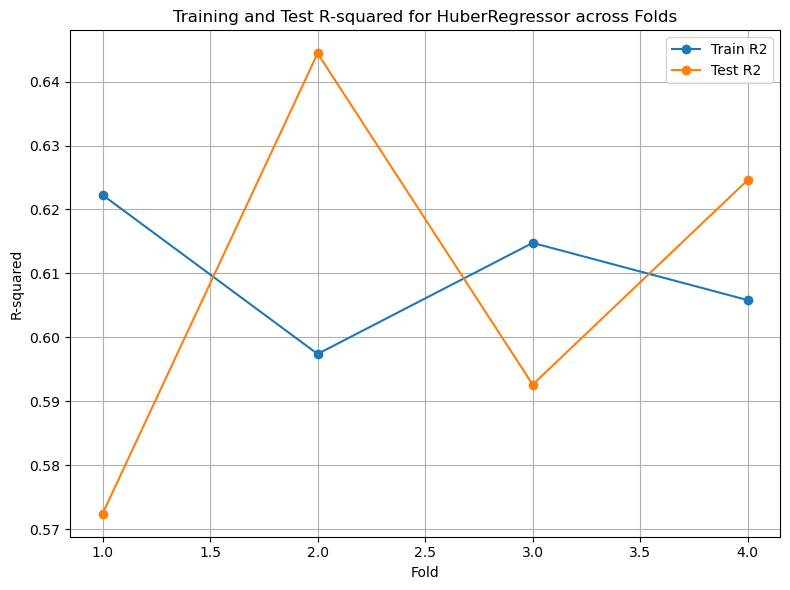

_________________________
SGDRegressor
Train mean squared error score: 8105400.501389635
Test mean squared error score: 8156632.167313928
Train R2 score: 0.6211076924735677
Test R2 score: 0.6194942928245936


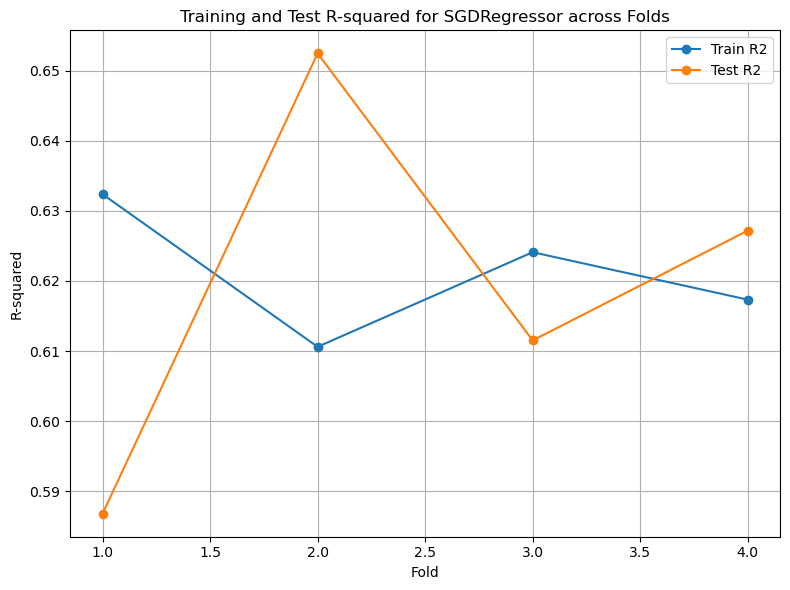

_________________________
Svr
Train mean squared error score: 20347032.873973906
Test mean squared error score: 20355671.810906705
Train R2 score: 0.0485955199853729
Test R2 score: 0.04802916046396477


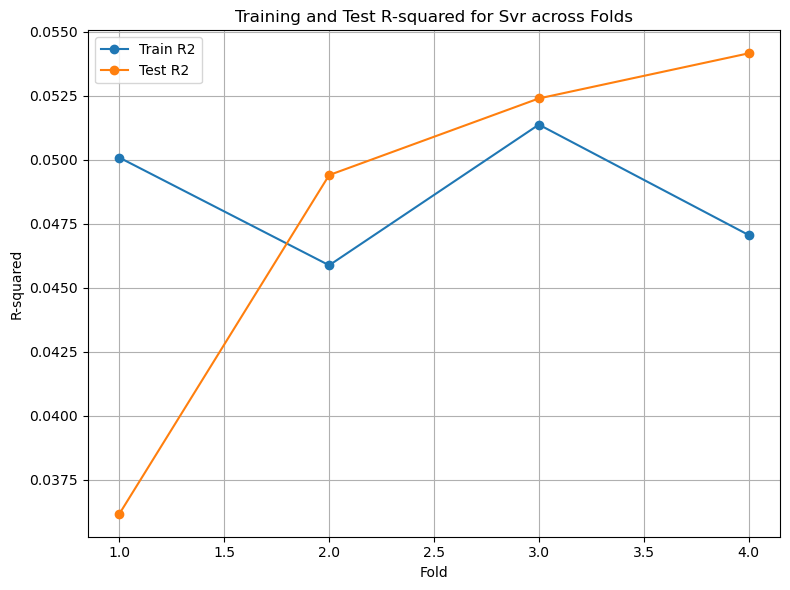

_________________________
DecisionTreeRegressor
Train mean squared error score: 587039.6258448099
Test mean squared error score: 6579605.038588423
Train R2 score: 0.972540910858341
Test R2 score: 0.6916042449114153


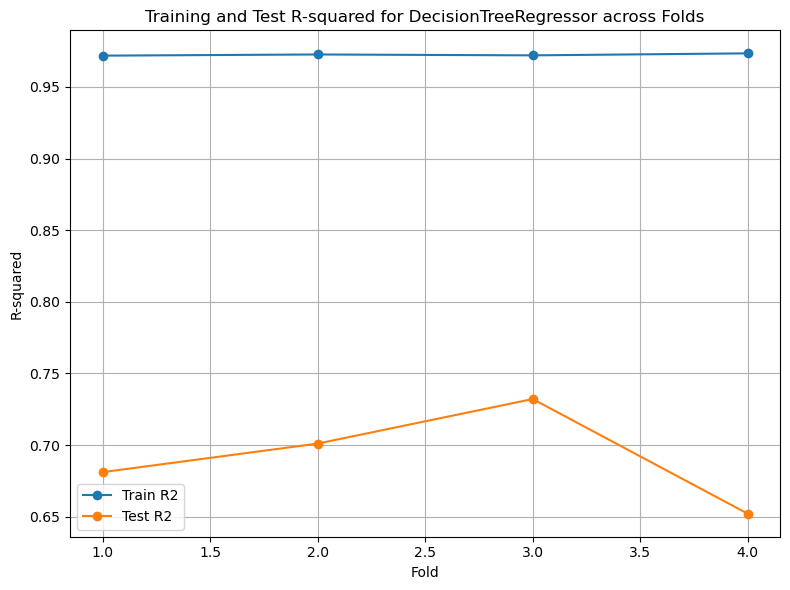

_________________________
XGBRegressor
Train mean squared error score: 1327427.5272470214
Test mean squared error score: 3449301.0967809167
Train R2 score: 0.9379222862361071
Test R2 score: 0.8390953800601664


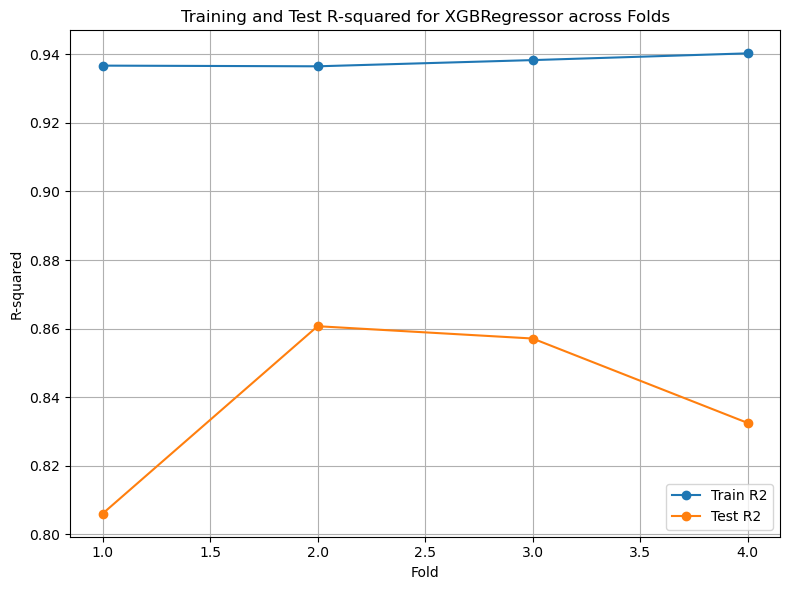

_________________________
RandomForestRegressor
Train mean squared error score: 948640.5287196869
Test mean squared error score: 4243859.722620374
Train R2 score: 0.9556251377169901
Test R2 score: 0.8014202020900325


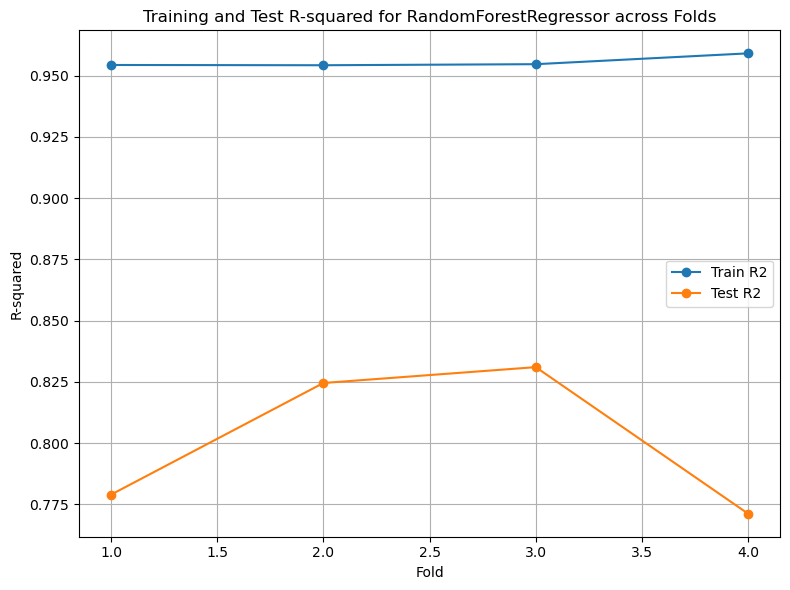

_________________________


In [65]:
for model_name, model_instance in models.items():
    pipeline = Pipeline([
        ("transform", preprocessor),
        ("scaler", StandardScaler()),
        ('model', model_instance)
    ])
    
    # Fit and evaluate the pipeline using cross-validation
    scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
    print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
    print("Train R2 score:", scores["train_r2"].mean())
    print("Test R2 score:", scores["test_r2"].mean())

    # Plotting train and test R-squared scores
    train_r2 = scores["train_r2"]
    test_r2 = scores["test_r2"]

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_r2) + 1), train_r2, label='Train R2', marker='o')
    plt.plot(range(1, len(test_r2) + 1), test_r2, label='Test R2', marker='o')
    plt.xlabel('Fold')
    plt.ylabel('R-squared')
    plt.title(f'Training and Test R-squared for {model_name} across Folds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("_" * 25)


LinearRegression
Train mean squared error score: 8056991.504168261
Test mean squared error score: 8135030.937332632
Train R2 score: 0.62337475950985
Test R2 score: 0.6205748042592079


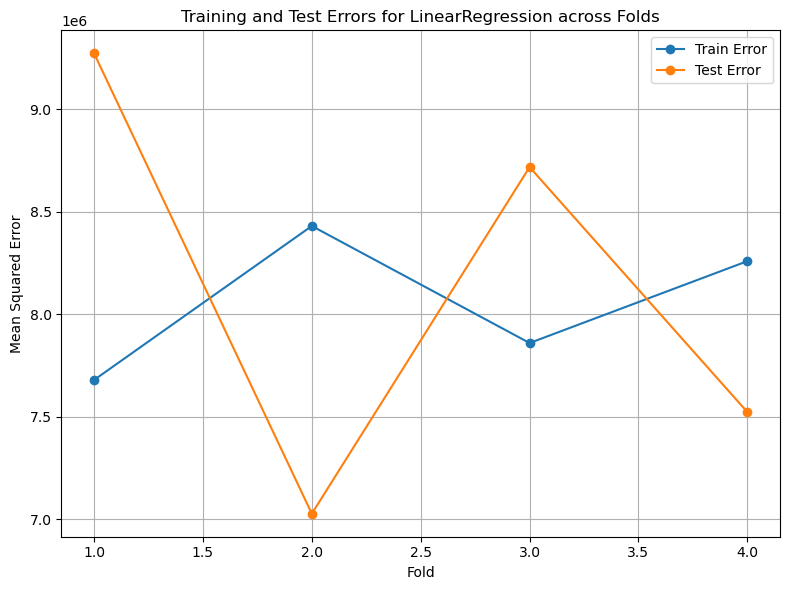

_________________________


D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


LogisticRegression
Train mean squared error score: 11462220.485367253
Test mean squared error score: 11626526.323163733
Train R2 score: 0.46389699688564234
Test R2 score: 0.45607903488858537


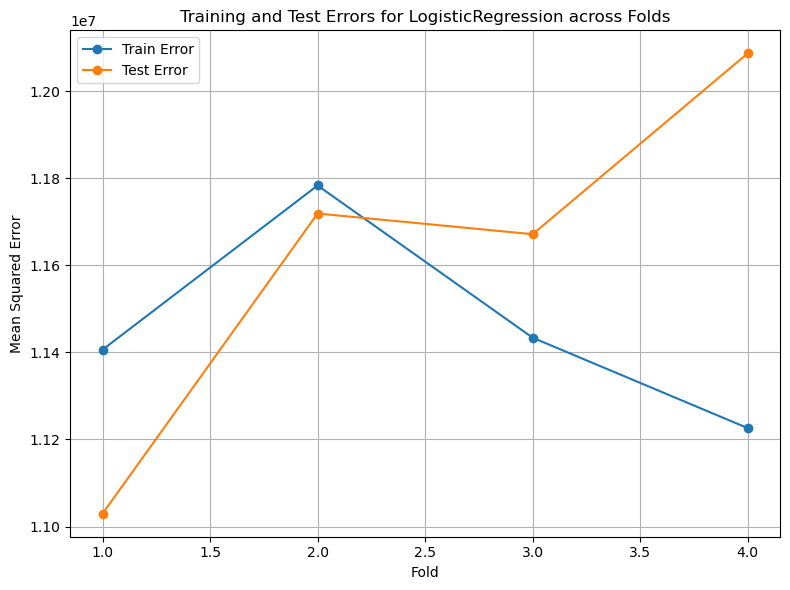

_________________________
ridge
Train mean squared error score: 8100727.581880716
Test mean squared error score: 8160792.4103850005
Train R2 score: 0.6213273913637221
Test R2 score: 0.6192407980091856


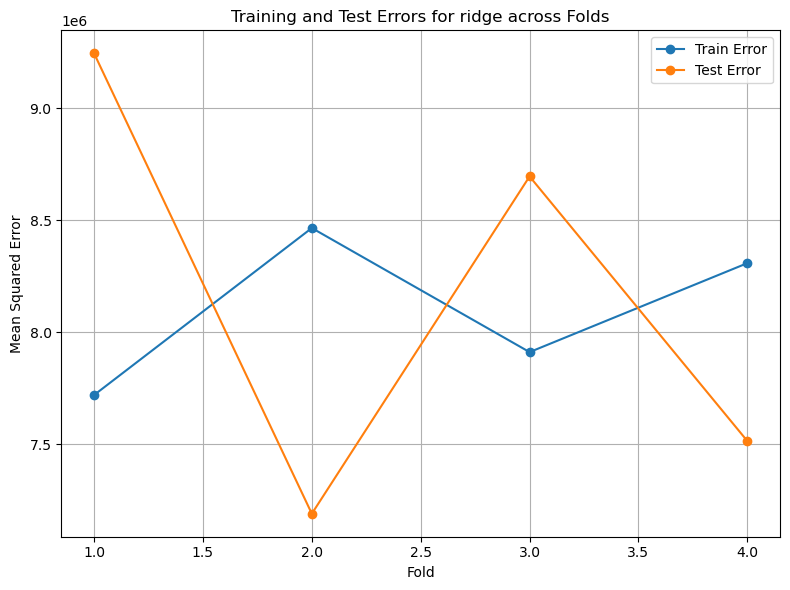

_________________________
lasso
Train mean squared error score: 8059422.681550838
Test mean squared error score: 8133527.667223715
Train R2 score: 0.6232613622698533
Test R2 score: 0.6206232815191803


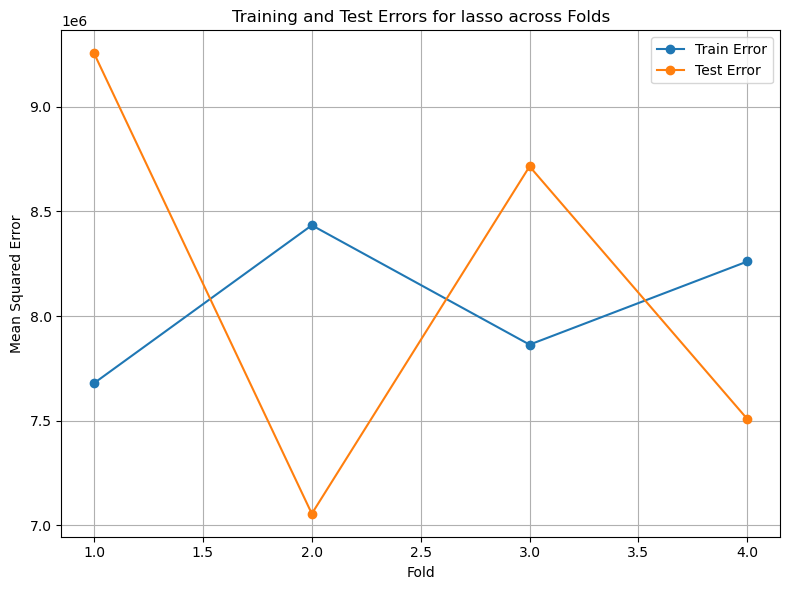

_________________________
ElasticNet
Train mean squared error score: 14993260.12170247
Test mean squared error score: 15011105.821248755
Train R2 score: 0.2989313760852131
Test R2 score: 0.29831443095532184


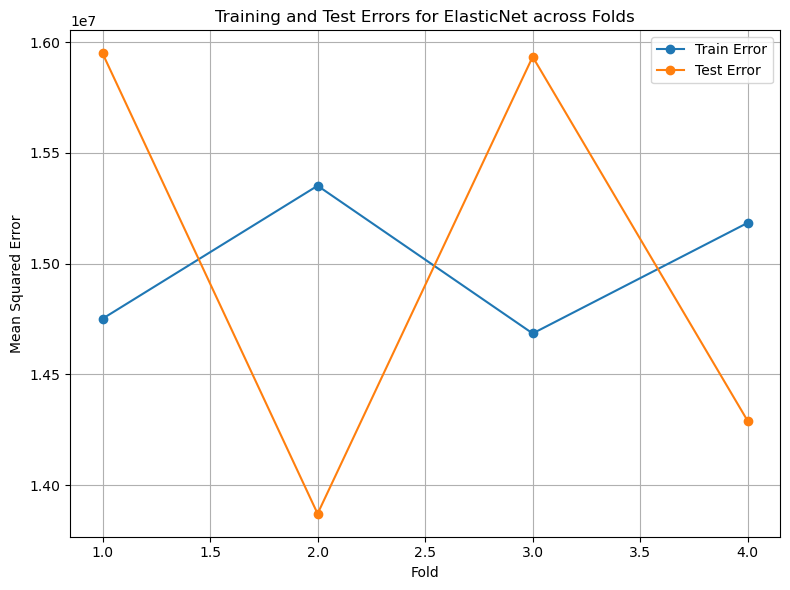

_________________________
HuberRegressor
Train mean squared error score: 8403449.831536405
Test mean squared error score: 8443209.749944346
Train R2 score: 0.6071900905861989
Test R2 score: 0.606280508832708


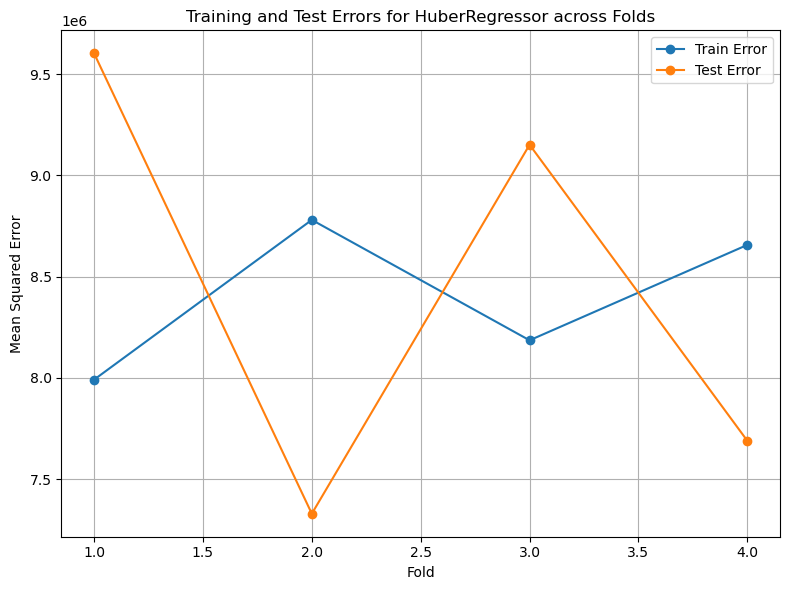

_________________________
SGDRegressor
Train mean squared error score: 8619873.019677928
Test mean squared error score: 8694861.228203448
Train R2 score: 0.597051078585412
Test R2 score: 0.5938633536889625


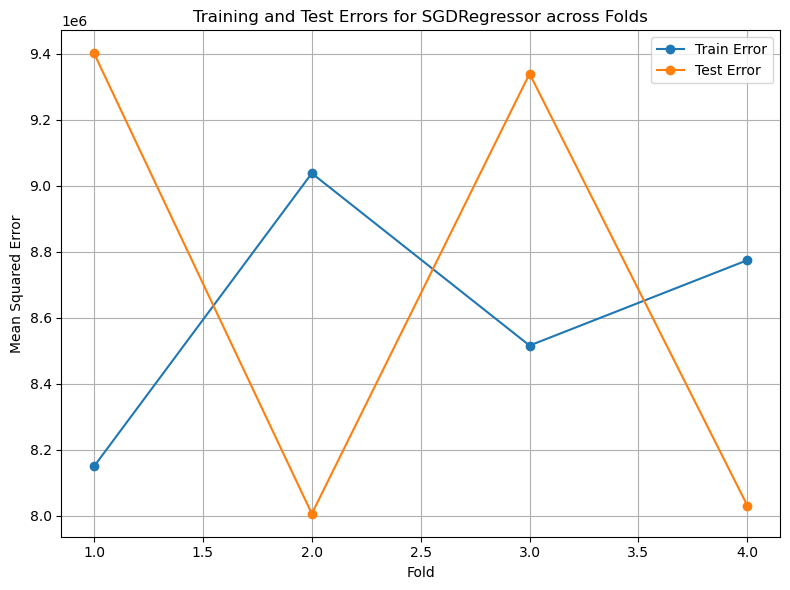

_________________________
Svr
Train mean squared error score: 20329321.36463132
Test mean squared error score: 20337737.635625575
Train R2 score: 0.04942235876888312
Test R2 score: 0.04887136832222874


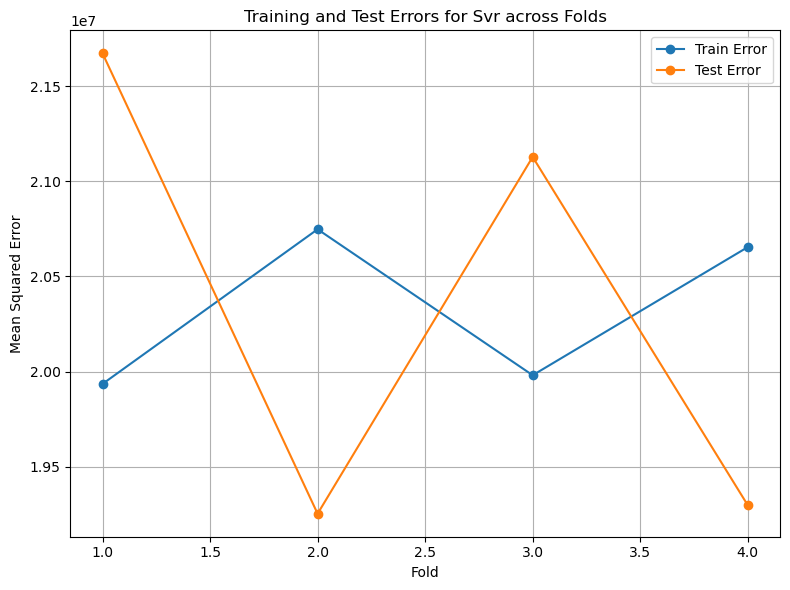

_________________________
DecisionTreeRegressor
Train mean squared error score: 587039.6258448099
Test mean squared error score: 6378401.012704827
Train R2 score: 0.972540910858341
Test R2 score: 0.701512662602944


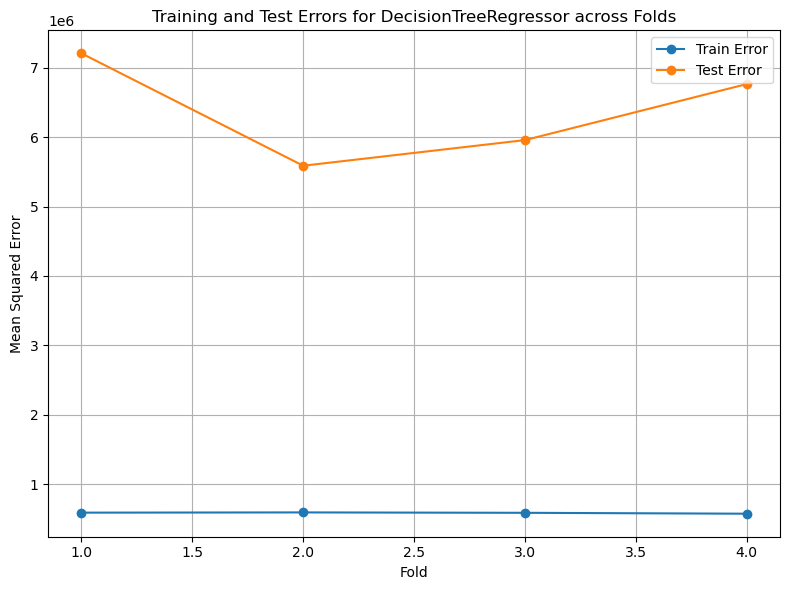

_________________________
XGBRegressor
Train mean squared error score: 1327427.5272470214
Test mean squared error score: 3449884.9262200105
Train R2 score: 0.9379222862361071
Test R2 score: 0.8390711523242054


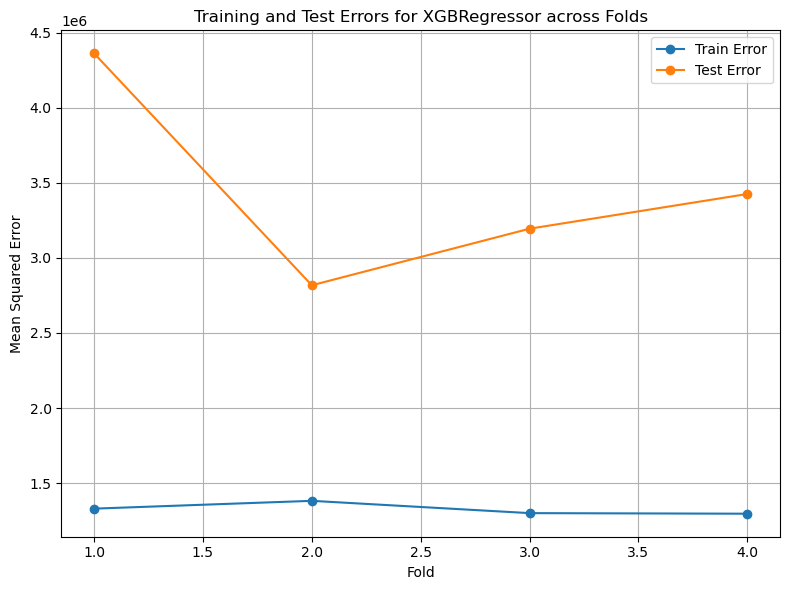

_________________________
RandomForestRegressor
Train mean squared error score: 963187.1707508857
Test mean squared error score: 4260704.38362365
Train R2 score: 0.9549544177697876
Test R2 score: 0.8005822383642621


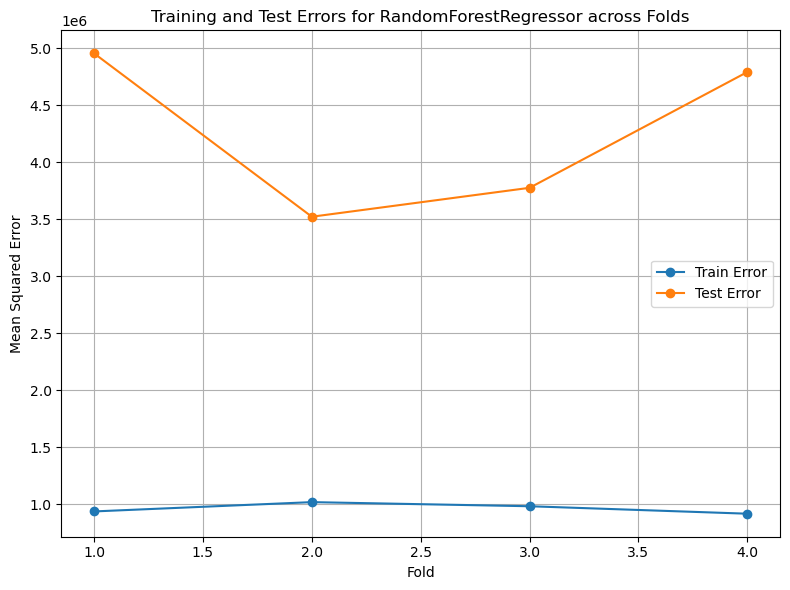

_________________________


In [66]:
for model_name, model_instance in models.items():
    pipeline = Pipeline([
        ("transform", preprocessor),
        ("scaler", MinMaxScaler()),
        ('model', model_instance )
    ])
    # Fit and evaluate the pipeline using cross-validation
    scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
    print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
    print("Train R2 score:", scores["train_r2"].mean())
    print("Test R2 score:", scores["test_r2"].mean())
    
    # Plotting train and test errors
    train_errors = -scores["train_neg_mean_squared_error"]
    test_errors = -scores["test_neg_mean_squared_error"]

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error', marker='o')
    plt.plot(range(1, len(test_errors) + 1), test_errors, label='Test Error', marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Test Errors for {model_name} across Folds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("_"*25)



Gradient Boosting

lgb
Train mean squared error score: 2742520.57211419
Test mean squared error score: 3976513.970346636
Train R2 score: 0.871735564328658
Test R2 score: 0.8142497534436907


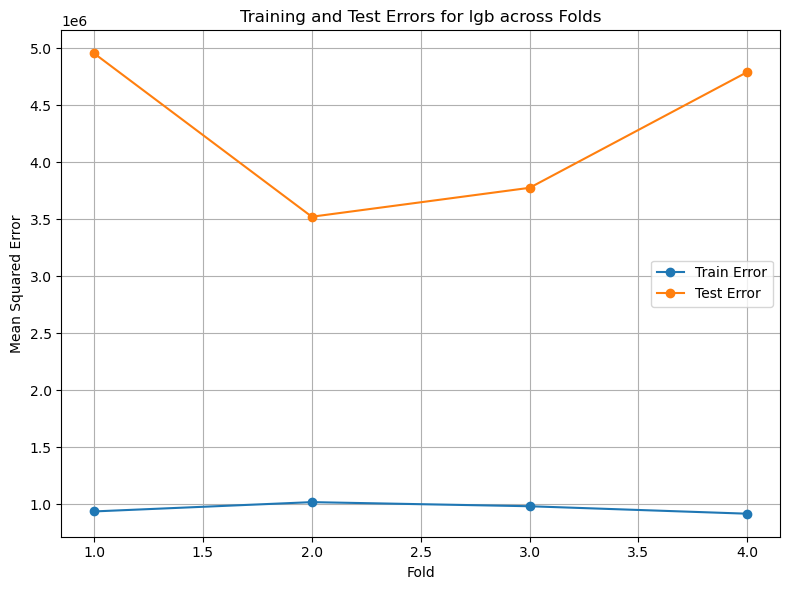

_________________________
xgb
Train mean squared error score: 1327427.5272470214
Test mean squared error score: 3449884.9262200105
Train R2 score: 0.9379222862361071
Test R2 score: 0.8390711523242054


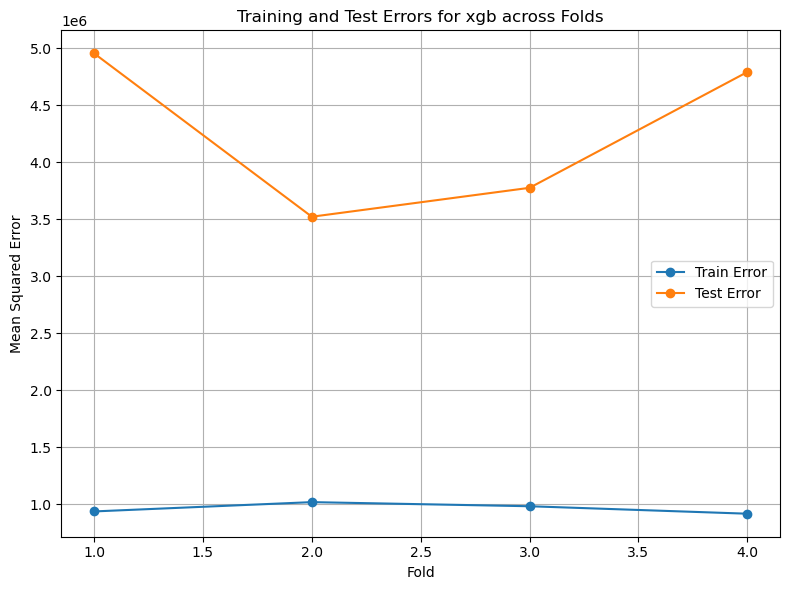

_________________________
GradientBoosting
Train mean squared error score: 4538662.448304061
Test mean squared error score: 4933744.2961338265
Train R2 score: 0.7878322258066498
Test R2 score: 0.7700436288856116


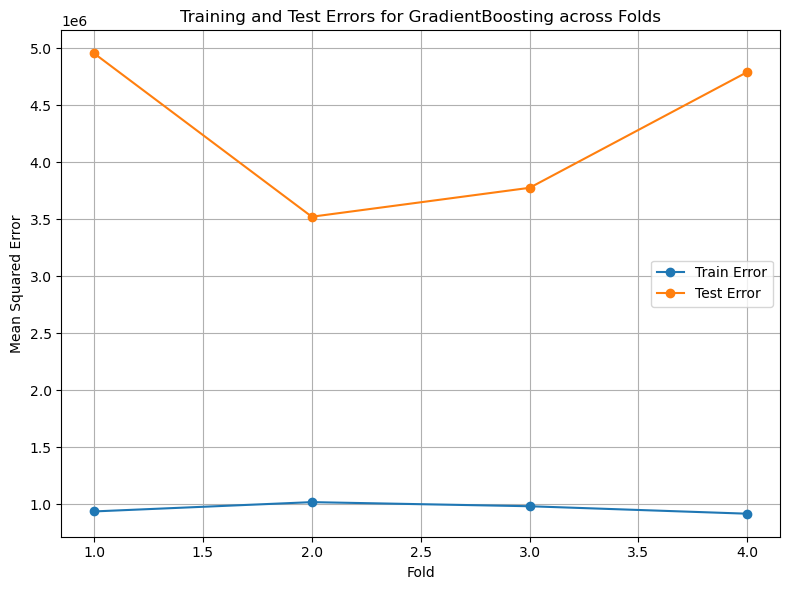

_________________________


In [67]:
models = {
    "lgb": lgb.LGBMRegressor(),  
    "xgb": XGBRegressor(), 
    "GradientBoosting": GradientBoostingRegressor()  
}

for model_name, model_instance in models.items():

    pipeline = Pipeline([
        ("transform", preprocessor),
        ("scaler", MinMaxScaler()),
        ('model', model_instance )
    ])
    # Fit and evaluate the pipeline using cross-validation
    scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
    print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
    print("Train R2 score:", scores["train_r2"].mean())
    print("Test R2 score:", scores["test_r2"].mean())
    
    # Plotting train and test errors
    train_errors_ = -scores["train_neg_mean_squared_error"]
    test_errors_ = -scores["test_neg_mean_squared_error"]

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_errors_) + 1), train_errors, label='Train Error', marker='o')
    plt.plot(range(1, len(test_errors_) + 1), test_errors, label='Test Error', marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Training and Test Errors for {model_name} across Folds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("_"*25)

knn

In [68]:
pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", MinMaxScaler()),
    ('model', KNeighborsRegressor(n_neighbors=6) )
])
# Fit and evaluate the pipeline using cross-validation
scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
print("Train R2 score:", scores["train_r2"].mean())
print("Test R2 score:", scores["test_r2"].mean())

Train mean squared error score: 4107114.678601158
Test mean squared error score: 5799271.681851993
Train R2 score: 0.8079682553167027
Test R2 score: 0.7289759880566309


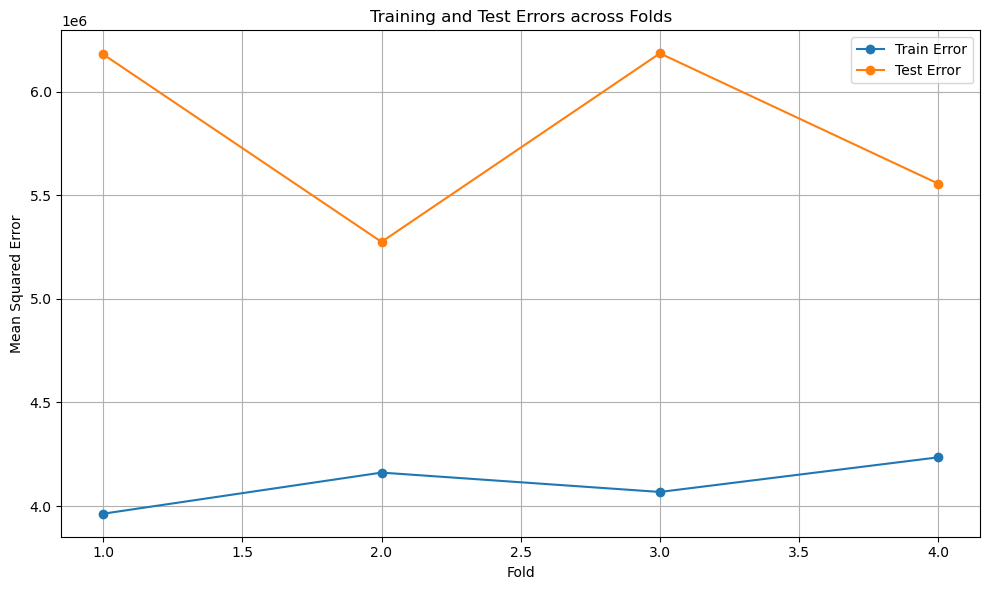

In [69]:
train_errors = -scores["train_neg_mean_squared_error"]
test_errors = -scores["test_neg_mean_squared_error"]

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot training errors
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Train Error', marker='o')

# Plot test errors
plt.plot(range(1, len(test_errors) + 1), test_errors, label='Test Error', marker='o')

# Set labels and title
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors across Folds')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [57]:
pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", StandardScaler()),
    ('model', XGBRegressor())
])

pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", StandardScaler()),
    ('model', XGBRegressor())
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 4, 5, 6],
    'model__subsample': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'model__reg_lambda': [0, 0.001, 0.01, 0.1, 1]
    
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=4, scoring=scoring, refit='neg_mean_squared_error', n_jobs=-1, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X, y)

# Get the best estimator and its evaluation scores
best_estimator = grid_search.best_estimator_
best_scores = grid_search.cv_results_

print("Best Estimator:", best_estimator)
print("Best Parameters:", grid_search.best_params_)
print("Best Train mean squared error score:", -best_scores["mean_train_neg_mean_squared_error"][grid_search.best_index_])
print("Best Test mean squared error score:", -best_scores["mean_test_neg_mean_squared_error"][grid_search.best_index_])
print("Best Train R2 score:", best_scores["mean_train_r2"][grid_search.best_index_])
print("Best Test R2 score:", best_scores["mean_test_r2"][grid_search.best_index_])


D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Estimator: Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_ro...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
             

In [58]:
best_estimator

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_ro...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=200,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [59]:
pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", MinMaxScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ('model', LinearRegression() )
])
scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
print("Train R2 score:", scores["train_r2"].mean())
print("Test R2 score:", scores["test_r2"].mean())

Train mean squared error score: 5518136.058351664
Test mean squared error score: 7.325633769441079e+25
Train R2 score: 0.7420737740587082
Test R2 score: -3.259543064450012e+18


In [60]:
pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", MinMaxScaler()),
    ('featureselection',SequentialFeatureSelector(estimator=XGBRegressor(),k_features='best',forward=True,
                                                  scoring='neg_mean_squared_error',cv=4) ),
    ('model', XGBRegressor() )
])
scores = cross_validate(pipeline, X, y, cv=4, scoring=scoring, n_jobs=-1, return_train_score=True)
print("Train mean squared error score:", -scores["train_neg_mean_squared_error"].mean())
print("Test mean squared error score:", -scores["test_neg_mean_squared_error"].mean())
print("Train R2 score:", scores["train_r2"].mean())
print("Test R2 score:", scores["test_r2"].mean())

Train mean squared error score: 1436059.5825985959
Test mean squared error score: 3495045.2525419937
Train R2 score: 0.9328916489446817
Test R2 score: 0.8368442876295452


### chosen model

In [ ]:
pipeline = Pipeline([
    ("transform", preprocessor),
    ("scaler", MinMaxScaler()),
    ('model', XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 200, reg_alpha= 1,
                           reg_lambda= 1, subsample= 0.9) )
])
pipeline.fit(X,y)

In [ ]:
#import pickle


#pickle.dump(pipeline, open('model.pkl', 'wb'))
# Save the column names instead of the entire X DataFrame
#with open('input_columns.pkl', 'wb') as file:
   # pickle.dump(X.columns.tolist(), file)